# 读取土壤湿度数据 -- 附件3 

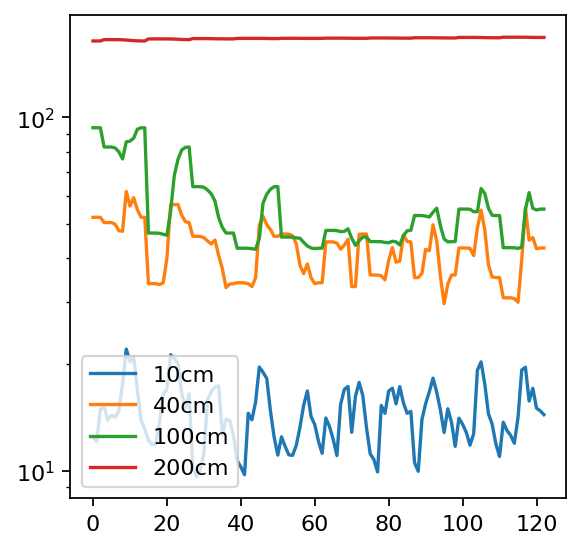

In [411]:
import pandas as pd
import matplotlib.pyplot as plt
data3 = pd.read_excel(io=r'附件3、土壤湿度2022—2012年.xls')
#print(data3)
plt.figure(figsize=(4,4),dpi=160)
plt.yscale('log')
plt.plot(data3['10cm湿度(kg/m2)'][:])
plt.plot(data3['40cm湿度(kg/m2)'][:])
plt.plot(data3['100cm湿度(kg/m2)'][:])
plt.plot(data3['200cm湿度(kg/m2)'][:])
plt.legend(['10cm','40cm','100cm','200cm'])

# 土壤蒸发量 附件4

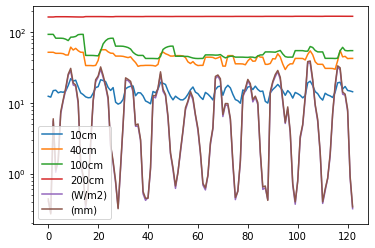

In [412]:
data4 = pd.read_excel(io=r'附件4、土壤蒸发量2012—2022年.xls')
#print(data4)
plt.yscale('log')

plt.plot(data3['10cm湿度(kg/m2)'][:])
plt.plot(data3['40cm湿度(kg/m2)'][:])
plt.plot(data3['100cm湿度(kg/m2)'][:])
plt.plot(data3['200cm湿度(kg/m2)'][:])

plt.plot(data4['土壤蒸发量(W/m2)'][:])
plt.plot(data4['土壤蒸发量(mm)'][:])
plt.legend(['10cm','40cm','100cm','200cm','(W/m2)','(mm)'])

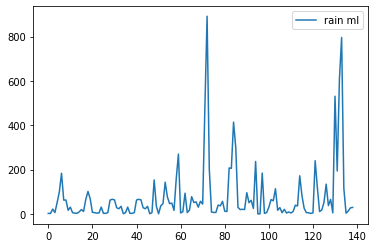

In [355]:
data8_1 = pd.read_excel(io=r'./附件8、锡林郭勒盟气候2012-2022/2012年.xls')
data8_2 = pd.read_excel(io=r'./附件8、锡林郭勒盟气候2012-2022/2013年.xls')
data8_3 = pd.read_excel(io=r'./附件8、锡林郭勒盟气候2012-2022/2014年.xls')
data8_4 = pd.read_excel(io=r'./附件8、锡林郭勒盟气候2012-2022/2015年.xls')
data8_5 = pd.read_excel(io=r'./附件8、锡林郭勒盟气候2012-2022/2016年.xls')
data8_6 = pd.read_excel(io=r'./附件8、锡林郭勒盟气候2012-2022/2017年.xls')
data8_7 = pd.read_excel(io=r'./附件8、锡林郭勒盟气候2012-2022/2018年.xls')
data8_8 = pd.read_excel(io=r'./附件8、锡林郭勒盟气候2012-2022/2019年.xls')
data8_9 = pd.read_excel(io=r'./附件8、锡林郭勒盟气候2012-2022/2020年.xls')
data8_10 = pd.read_excel(io=r'./附件8、锡林郭勒盟气候2012-2022/2021年.xls')
data8_11 = pd.read_excel(io=r'./附件8、锡林郭勒盟气候2012-2022/2022年.xls')
fallwater = []
fallwater = list(data8_1['降水量(mm)'][:]) + list(data8_2['降水量(mm)'][:]) + list(data8_3['降水量(mm)'][:]) + list(data8_3['降水量(mm)'][:]) \
            + list(data8_4['降水量(mm)'][:]) + list(data8_5['降水量(mm)'][:]) + list(data8_6['降水量(mm)'][:]) + list(data8_7['降水量(mm)'][:]) \
            + list(data8_8['降水量(mm)'][:]) + list(data8_9['降水量(mm)'][:]) + list(data8_10['降水量(mm)'][:]) + list(data8_11['降水量(mm)'][:])
#print(data8_1)
plt.plot(fallwater)
plt.legend([r'rain ml'])

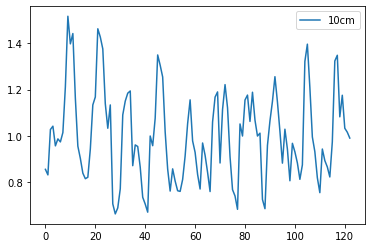

In [413]:
Norn_10cm = data3['10cm湿度(kg/m2)'][:]/(sum(data3['10cm湿度(kg/m2)'][:]/len(data3['10cm湿度(kg/m2)'][:])))
plt.plot(Norn_10cm)
#plt.plot(data3['40cm湿度(kg/m2)'][:])
#plt.plot(data3['100cm湿度(kg/m2)'][:])
#plt.plot(data3['200cm湿度(kg/m2)'][:])
#plt.plot(data4['土壤蒸发量(mm)'][:])
#plt.plot(fallwater)
#plt.legend(['10cm','40cm','100cm','200cm','evaporation (mm)','rain ml'])
plt.legend(['10cm','40cm','evaporation (mm)','rain ml'])

# fitting of rain

### FFT

In [360]:
import numpy as np
from scipy.fftpack import fft,fftshift
import matplotlib.pyplot as plt


#N = 1024                        # 采样点数
#sample_freq=120                 # 采样频率 120 Hz, 大于两倍的最高频率
#sample_interval=1/sample_freq   # 采样间隔
#signal_len=N*sample_interval    # 信号长度
#t=np.arange(0,signal_len,sample_interval)

# t = (0:1 / sample_freq:(N-1) / sample_freq)
#signal = 5 + 2 * np.sin(2 * np.pi * 20 * t) + 3 * np.sin(2 * np.pi * 30 * t) + 4 * np.sin(2 * np.pi * 40 * t)  # 采集的信号

N = len(fallwater)
Norn_rain = np.array(fallwater)/(sum(fallwater)/N)
sample_freq = 12

fft_data = np.fft.fft(Norn_rain)
#fft_data = fft(signal)
# 这里幅值要进行一定的处理，才能得到与真实的信号幅值相对应
fft_amp0 = np.array(np.abs(fft_data)/N*2)   # 用于计算双边谱
direct=fft_amp0[0]
fft_amp0[0]=0.5*direct
N_2 = int(N/2)

fft_amp1 = fft_amp0[0:N_2]  # 单边谱
fft_amp0_shift = fftshift(fft_amp0)    # 使用fftshift将信号的零频移动到中间

# 计算频谱的频率轴
list0 = np.array(range(0, N))
list1 = np.array(range(0, int(N/2)))
list0_shift = np.array(range(0, N))
freq0 = sample_freq*list0/N        # 双边谱的频率轴
freq1 = sample_freq*list1/N        # 单边谱的频率轴
freq0_shift=sample_freq*list0_shift/N-sample_freq/2  # 零频移动后的频率轴

'''
# 绘制结果
plt.figure(figsize=(6,6),dpi=160)
# 原信号
plt.subplot(221)
t = np.array(range(len(signal)))/12
plt.plot(t, signal)
plt.title(' Original signal')
plt.xlabel('t (s)')
plt.ylabel(' Amplitude ')
# 双边谱
plt.subplot(222)
plt.plot(freq0, fft_amp0)
plt.title(' spectrum two-sided')
plt.xlabel('frequency  (Hz)')
plt.ylabel(' Amplitude ')
# 单边谱
plt.subplot(223)
plt.plot(freq1, fft_amp1)
plt.title(' spectrum single-sided')
plt.xlabel('frequency  (Hz)')
plt.ylabel(' Amplitude ')
# 移动零频后的双边谱

plt.subplot(224)
plt.plot(freq0_shift, fft_amp0_shift)
plt.title('spectrum two-sided shifted')
plt.xlabel('frequency  (Hz)')
plt.ylabel(' Amplitude ')
plt.savefig('test.pdf')
plt.show()
'''

"\n# 绘制结果\nplt.figure(figsize=(6,6),dpi=160)\n# 原信号\nplt.subplot(221)\nt = np.array(range(len(signal)))/12\nplt.plot(t, signal)\nplt.title(' Original signal')\nplt.xlabel('t (s)')\nplt.ylabel(' Amplitude ')\n# 双边谱\nplt.subplot(222)\nplt.plot(freq0, fft_amp0)\nplt.title(' spectrum two-sided')\nplt.xlabel('frequency  (Hz)')\nplt.ylabel(' Amplitude ')\n# 单边谱\nplt.subplot(223)\nplt.plot(freq1, fft_amp1)\nplt.title(' spectrum single-sided')\nplt.xlabel('frequency  (Hz)')\nplt.ylabel(' Amplitude ')\n# 移动零频后的双边谱\n\nplt.subplot(224)\nplt.plot(freq0_shift, fft_amp0_shift)\nplt.title('spectrum two-sided shifted')\nplt.xlabel('frequency  (Hz)')\nplt.ylabel(' Amplitude ')\nplt.savefig('test.pdf')\nplt.show()\n"

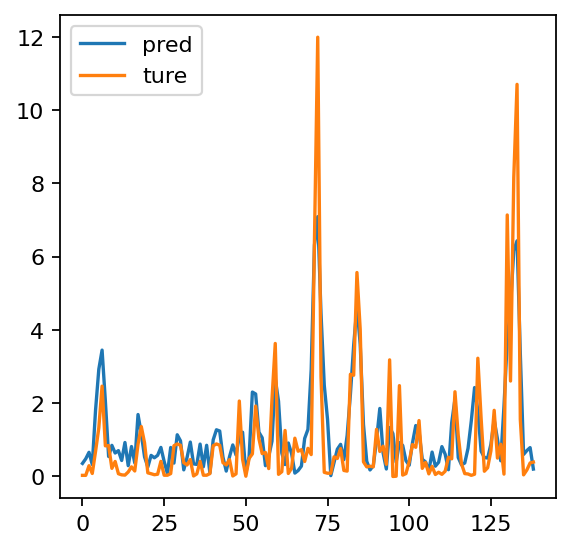

In [373]:
#index = np.argmax(fft_amp0)
# ==  find the max fn amp
import math
fn = 32
index = np.argpartition(fft_amp0.ravel(), -fn)[-fn:]
#print(fft_amp0[index])
new_fft_data = []
for i in range(len(fft_data)):
    if i not in index:
        new_fft_data.append(0)
    else:
        new_fft_data.append(fft_data[i])

iy=np.abs(np.fft.ifft(new_fft_data))
plt.figure(figsize=(4,4),dpi=160)
plt.plot(iy)
plt.plot(Norn_rain)
plt.legend(['pred','ture'])


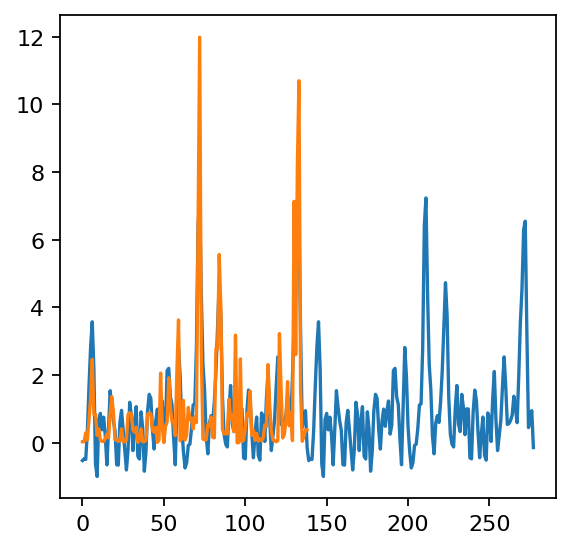

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 函数功能：将频域数据转换成时序数据
# bins为频域数据，n设置使用前多少个频域数据，loop设置生成数据的长度

def fft_combine(bins, n, loops=1):
  length = int(len(bins) * loops)
  data = np.zeros(length)
  index = loops * np.arange(0, length, 1.0) / length * (2 * np.pi)
  for k, p in enumerate(bins[:n]):
    if k != 0 : p *= 2 # 除去直流成分之外, 其余的系数都 * 2
    data += np.real(p) * np.cos(k*index) # 余弦成分的系数为实数部分
    data -= np.imag(p) * np.sin(k*index) # 正弦成分的系数为负的虚数部分
  return index, data/len(bins)

index, pred_rain = fft_combine(new_fft_data, int(len(new_fft_data)/2-1), 2) # 只关心一半数据

plt.figure(figsize=(4,4),dpi=160)
plt.plot(pred_rain)
plt.plot(Norn_rain)
plt.show()

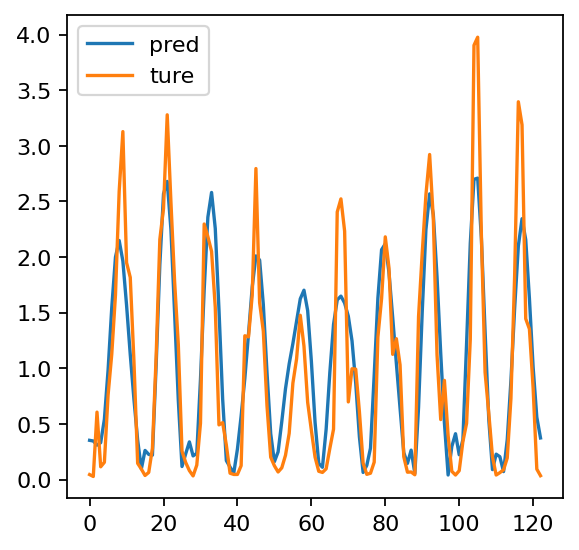

In [388]:
N = len(data4['土壤蒸发量(mm)'][:])
Norn_evap = data4['土壤蒸发量(mm)'][:]/(sum(data4['土壤蒸发量(mm)'][:])/N)
sample_freq = 12
fft_data = np.fft.fft(Norn_evap)
# 这里幅值要进行一定的处理，才能得到与真实的信号幅值相对应
fft_amp0 = np.array(np.abs(fft_data)/N*2)   # 用于计算双边谱
direct=fft_amp0[0]
fft_amp0[0]=0.5*direct
N_2 = int(N/2)
# ==  find the max fn amp
fn = 12
index = np.argpartition(fft_amp0.ravel(), -fn)[-fn:]
#print(fft_amp0[index])
new_fft_data = []
for i in range(len(fft_data)):
    if i not in index:
        new_fft_data.append(0)
    else:
        new_fft_data.append(fft_data[i])

iy=np.abs(np.fft.ifft(new_fft_data))
plt.figure(figsize=(4,4),dpi=160)
plt.plot(iy)
plt.plot(Norn_evap)
plt.legend(['pred','ture'])


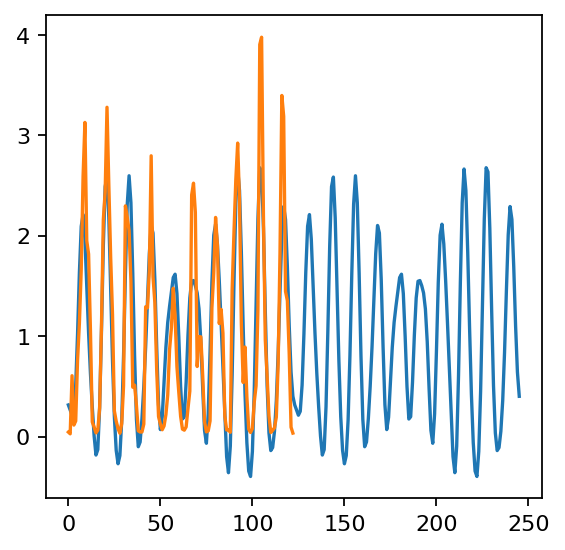

In [389]:
# 函数功能：将频域数据转换成时序数据
# bins为频域数据，n设置使用前多少个频域数据，loop设置生成数据的长度

def fft_combine(bins, n, loops=1):
  length = int(len(bins) * loops)
  data = np.zeros(length)
  index = loops * np.arange(0, length, 1.0) / length * (2 * np.pi)
  for k, p in enumerate(bins[:n]):
    if k != 0 : p *= 2 # 除去直流成分之外, 其余的系数都 * 2
    data += np.real(p) * np.cos(k*index) # 余弦成分的系数为实数部分
    data -= np.imag(p) * np.sin(k*index) # 正弦成分的系数为负的虚数部分
  return index, data/len(bins)

index, pred_evop = fft_combine(new_fft_data, int(len(new_fft_data)/2-1), 2) # 只关心一半数据
plt.figure(figsize=(4,4),dpi=160)
plt.plot(pred_evop)
plt.plot(Norn_evap)
plt.show()

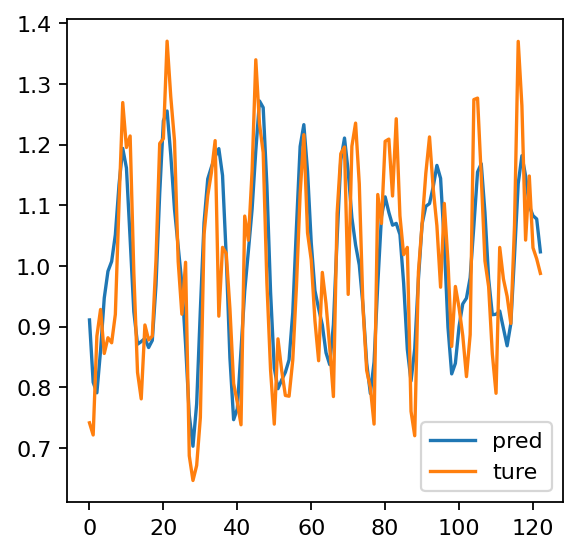

In [446]:
toatl = data3['10cm湿度(kg/m2)'][:] + data3['40cm湿度(kg/m2)'][:] + data3['100cm湿度(kg/m2)'][:] + data3['200cm湿度(kg/m2)'][:]
pro = data3['10cm湿度(kg/m2)'][:]/toatl

N = len(pro)
Norn_pro = pro/(sum(pro)/len(pro))
sample_freq = 12
fft_data = np.fft.fft(Norn_pro)
# 这里幅值要进行一定的处理，才能得到与真实的信号幅值相对应
fft_amp0 = np.array(np.abs(fft_data)/N*2)   # 用于计算双边谱
direct=fft_amp0[0]
fft_amp0[0]=0.5*direct
N_2 = int(N/2)
# ==  find the max fn amp
fn = 10
index = np.argpartition(fft_amp0.ravel(), -fn)[-fn:]
#print(fft_amp0[index])
new_fft_data = []
for i in range(len(fft_data)):
    if i not in index:
        new_fft_data.append(0)
    else:
        new_fft_data.append(fft_data[i])

iy=np.abs(np.fft.ifft(new_fft_data))
plt.figure(figsize=(4,4),dpi=160)
plt.plot(iy)
plt.plot(Norn_pro)
plt.legend(['pred','ture'])


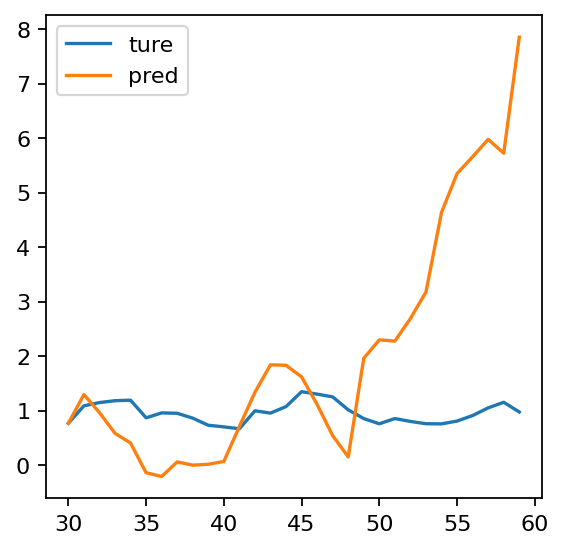

In [364]:
def beta(t0,t1):
    N = len(data4['土壤蒸发量(mm)'][:])
    delta = Norn_rain[:N] - 0.3*Norn_evap[:N]
    beta = sum(delta[t0:t1]*Norn_pro[t0:t1])+ Norn_10cm[t0]
    return beta

t = []
pred = []
t0 = 30
t1 = 60
for i in range(t1-t0):
    t.append(t0+i)
    pred.append(beta(t0,t0+i))
plt.figure(figsize=(4,4),dpi=160)
plt.plot(Norn_10cm[t0:t1])
plt.plot(t,pred)
plt.legend(["ture","pred"])

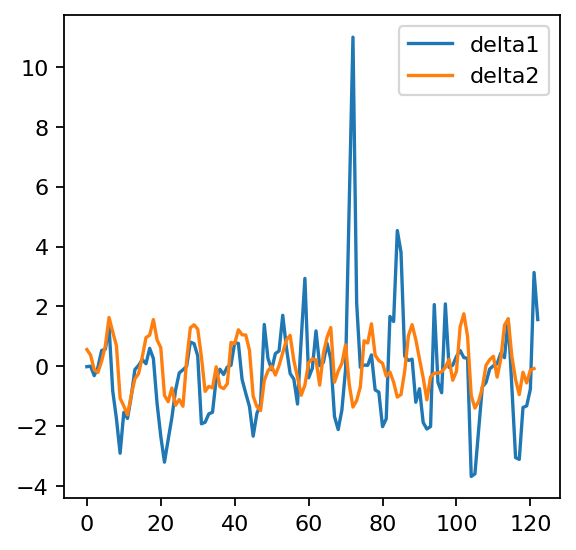

In [451]:
N = len(data4['土壤蒸发量(mm)'][:])


delta1 = Norn_rain[:N] - Norn_evap[:N] 
delta2 = (np.array(Norn_10cm[1:N])-np.array(Norn_10cm[0:N-1]))*6
Norn_200cm =  data3['200cm湿度(kg/m2)'][:]/(sum(data3['200cm湿度(kg/m2)'][:]/len(data3['200cm湿度(kg/m2)'][:])))
#delta2 = (np.array(Norn_200cm[1:N])-np.array(Norn_200cm[0:N-1]))*100

delta1 = np.convolve(delta1,[1], 'same')
delta2 = np.convolve(delta2,[1/2,1/2,1/2,0,0], 'same')


plt.figure(figsize=(4,4),dpi=160)
plt.plot(delta1)
plt.plot(delta2)
plt.legend(['delta1','delta2'])